# Doubling times ain't what they used to be

In [Stevenson and Kording](https://www.nature.com/articles/nn.2731) (2011), the authors showed a doubling time of 7.4 years for brain recording technology - [every 7.4 years, the number of neurons we can record with one apparatus doubles](https://stevenson.lab.uconn.edu/scaling/#). [Urai et al. (2021)](https://arxiv.org/abs/2103.14662) recently updated this analysis and were [kind enough to share the data they used for the analysis under a CC-BY license](https://github.com/anne-urai/largescale_recordings). There's something striking in the data: it looks like a linear fit on a log scale is a significant underfit, with a bit of an upper convexity - even excluding the imaging data - implying that progress on brain recording tech is accelerating. [Matteo Carandini raised a question](https://twitter.com/MatteoCarandini/status/1386746176939102218): why should it be log-linear anyway? 

Log-linear scaling would follow from a Moore's law type of scaling. However, technological phenomena have been argued to follow [a double-exponential curve](https://en.wikipedia.org/wiki/Accelerating_change): progress itself accelerates over time. This is only noticeable when we look over a very long time horizon, for instance, when we look at computation per dollars over more than a century (image [CC BY Steve Jurvetson](https://commons.wikimedia.org/wiki/File:Moore%27s_Law_over_120_Years.png)):

![Doubling times](https://upload.wikimedia.org/wikipedia/commons/thumb/6/62/Moore%27s_Law_over_120_Years.png/640px-Moore%27s_Law_over_120_Years.png)

Is progress itself in brain recording technology accelerating? Let's find out.

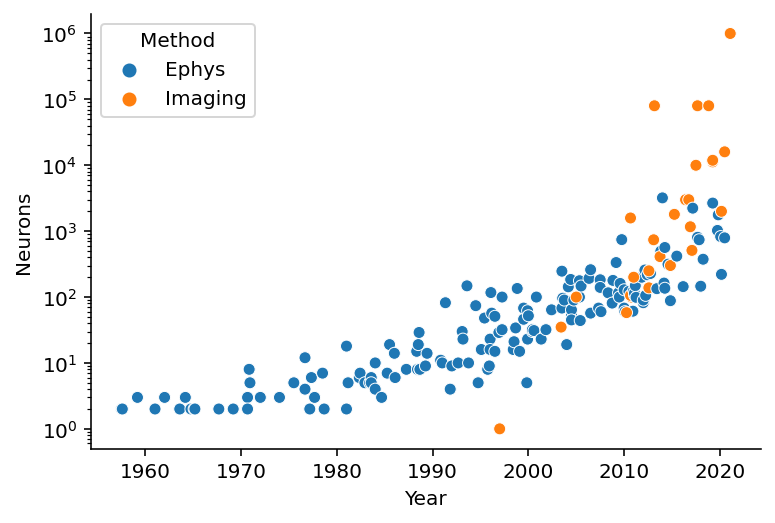

In [1]:
%config InlineBackend.figure_format = 'retina'

import arviz as az
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pymc3 as pm


df = pd.read_csv('Neural recordings - Neurons_year.csv')
df['Year'] = df['Year'] + (df['Month'] - 1) / 12

g = sns.scatterplot(x='Year', y='Neurons', hue='Method', data=df)
g.set(yscale='log')

sns.despine()

We can see that, only considering ephys, there's a bit of an upper convexity to the curve. Let's fit a decade-wise simple Bayesian Poisson regression model (exponential because of the log link) to this to see if we have accelarating changes.

In [2]:
def fit_single_exponential_model(df_, return_samples=False):
    with pm.Model() as mdl:

        # define priors, weakly informative Normal
        b0 = pm.Normal("b0_intercept", mu=0, sigma=10)
        b1 = pm.Normal("b1_time", mu=0, sigma=10)

        # define linear model and exp link function
        theta = (
            b0
            + b1 * (df_.Year.values - 2000) / 10
        )

        ## Define Poisson likelihood
        y = pm.Poisson("y", mu=np.exp(theta), observed=df_.Neurons.values)

    ppc = None
    with mdl:
        inf = pm.sample(1000, tune=1000, cores=4, return_inferencedata=True)

        if return_samples:
            ppc = pm.sample_posterior_predictive(
                inf, var_names=["b0_intercept", "b1_time"]
            )

    return inf, ppc

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [b1_time, b0_intercept]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 5 seconds.
The acceptance probability does not match the target. It is 0.8865223396355663, but should be close to 0.8. Try to increase the number of tuning steps.
There were 6 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.6670873661556276, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.9055548917324352, but should be close to 0.8. Try to increase the number of tuning steps.
The number of effective samples is smaller than 10% for some parameters.


mean      -0.089
hdi_3%    -1.129
hdi_97%    1.020
Name: b1_time, dtype: float64


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [b1_time, b0_intercept]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 3 seconds.
The number of effective samples is smaller than 25% for some parameters.


mean       0.196
hdi_3%    -0.556
hdi_97%    0.961
Name: b1_time, dtype: float64


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [b1_time, b0_intercept]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 3 seconds.
The acceptance probability does not match the target. It is 0.8795378797395822, but should be close to 0.8. Try to increase the number of tuning steps.
The number of effective samples is smaller than 25% for some parameters.


mean       1.061
hdi_3%     0.562
hdi_97%    1.486
Name: b1_time, dtype: float64


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [b1_time, b0_intercept]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 2 seconds.
The number of effective samples is smaller than 25% for some parameters.


mean       0.522
hdi_3%     0.333
hdi_97%    0.690
Name: b1_time, dtype: float64


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [b1_time, b0_intercept]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 2 seconds.
The acceptance probability does not match the target. It is 0.884667001516445, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8857753155117355, but should be close to 0.8. Try to increase the number of tuning steps.
The number of effective samples is smaller than 25% for some parameters.


mean       1.588
hdi_3%     1.492
hdi_97%    1.690
Name: b1_time, dtype: float64


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [b1_time, b0_intercept]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 3 seconds.
The acceptance probability does not match the target. It is 0.9051271959258084, but should be close to 0.8. Try to increase the number of tuning steps.
The number of effective samples is smaller than 25% for some parameters.


mean       1.999
hdi_3%     1.956
hdi_97%    2.039
Name: b1_time, dtype: float64


Text(0.5, 1.0, 'Decade-wise progress, piecewise linear model')

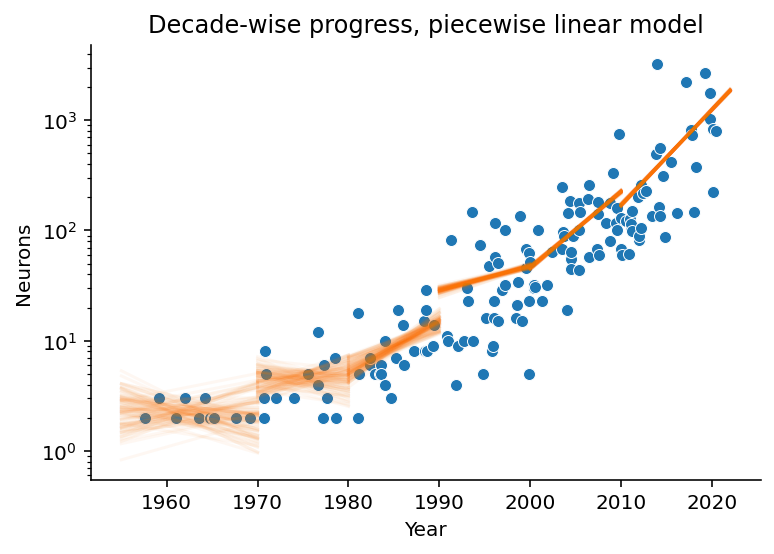

In [3]:
def fit_one_decade(df, lb, ub):
    df_ = df.query(f'Method == "Ephys" and Year >= {lb} and Year <= {ub}')
    inf, ppc = fit_single_exponential_model(df_, True)
    print(az.summary(inf).loc['b1_time', ['mean', 'hdi_3%', 'hdi_97%']])

    year = np.arange(lb, ub + 1)
    summ = az.summary(inf)

    doubling_times = []

    i = 0
    for b0, b1 in zip(ppc['b0_intercept'], ppc['b1_time']):
        slope = b1 / 10
        doubling_time = np.log(2) / slope
        doubling_times.append(doubling_time)

        pred = np.exp(b0 + b1 * (year - 2000) / 10)
        plt.semilogy(year, pred, alpha=.05, color='xkcd:orange')
        i += 1
        if i > 100:
            break

sns.despine()
fit_one_decade(df, 1955, 1970)
fit_one_decade(df, 1970, 1980)
fit_one_decade(df, 1980, 1990)
fit_one_decade(df, 1990, 2000)
fit_one_decade(df, 2000, 2010)
fit_one_decade(df, 2010, 2022)

g = sns.scatterplot(x='Year', y='Neurons', data=df.query('Method == "Ephys"'))
g.set(yscale='log')

sns.despine()
plt.title('Decade-wise progress, piecewise linear model')

Using this simple Bayesian Poisson regression approach, we can see that the trend appears to be accelerating over time, with every decade bringing faster progress, except for a brief respite in the 2000's. In 2010's, the doubling time is now 3.5. It looks, broadly, as though progress itself is accelerating. There's one annoying thing from the a technical point of view - each decade's performing is not contiguous with the last one. Let's fix that.

In [4]:
pairs = [(1955, 1970),
         (1970, 1980),
         (1980, 1990),
         (1990, 2000),
         (2000, 2010),
         (2010, 2021)]

def ramp(values, lb, ub):
    return (np.fmin(np.fmax(values, lb), ub) - lb) / 10

def fit_decade_model(df_, pairs, return_samples=False):
    with pm.Model() as mdl:
        
        theta = pm.Normal("b0", mu=0, sigma=10)
        mu = (np.zeros(len(pairs)))
        cov = (np.eye(len(pairs)) * 10)
        bs = pm.MvNormal("ramps", mu=mu, cov=cov, shape=len(pairs))
        
        for i, (lb, ub) in enumerate(pairs):
            theta += bs[i] * ramp(df_.Year.values, lb, ub)

        ## Define Poisson likelihood
        y = pm.Poisson("y", mu=np.exp(theta), observed=df_.Neurons.values)

    ppc = None
    with mdl:
        inf = pm.sample(1000, tune=1000, cores=4, return_inferencedata=True)

        if return_samples:
            ppc = pm.sample_posterior_predictive(
                inf, var_names=["b0", "ramps"]
            )

    return inf, ppc

inf, ppc = fit_decade_model(df.query('Method == "Ephys"'), pairs, True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ramps, b0]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 91 seconds.


In [5]:
az.summary(inf)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
b0,0.403,0.424,-0.402,1.158,0.011,0.008,1446.0,1668.0,1.00
ramps[0],0.617,0.356,-0.044,1.273,0.010,0.007,1294.0,1757.0,1.01
ramps[1],0.085,0.257,-0.399,0.571,0.007,0.005,1274.0,1652.0,1.01
ramps[2],1.717,0.154,1.419,2.000,0.004,0.003,1296.0,1999.0,1.00
ramps[3],0.811,0.066,0.683,0.926,0.002,0.001,1537.0,2282.0,1.00
ramps[4],1.314,0.032,1.252,1.372,0.001,0.001,1606.0,2254.0,1.00
ramps[5],1.850,0.019,1.813,1.884,0.000,0.000,1818.0,2257.0,1.00


Text(0.5, 1.0, 'Decade-wise progress, piecewise linear model')

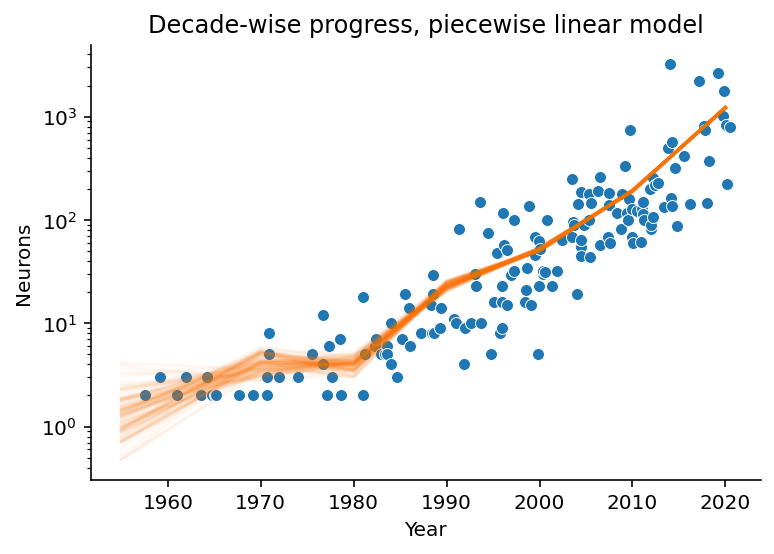

In [7]:
j = 0
year = np.arange(1955, 2021)
for b0, ramps in zip(ppc['b0'], ppc['ramps']):
    theta = b0
    for i, (lb, ub) in enumerate(pairs):
        theta += ramps[i] * ramp(year, lb, ub)
        
    pred = np.exp(theta)
    
    plt.semilogy(year, pred, alpha=.05, color='xkcd:orange')
    j += 1
    if j > 100:
        break
            
g = sns.scatterplot(x='Year', y='Neurons', data=df.query('Method == "Ephys"'))
g.set(yscale='log')

sns.despine()
plt.title('Decade-wise progress, piecewise linear model')

Following fits and spurts from the 1960's to the 1990's, the progress appears to be accelerating. Let's re-use the same code for a single linear fit. 

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ramps, b0]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 6 seconds.
The acceptance probability does not match the target. It is 0.8799923151248529, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8896085981449813, but should be close to 0.8. Try to increase the number of tuning steps.
The number of effective samples is smaller than 25% for some parameters.


4.579489173230389 0.028940170258438452


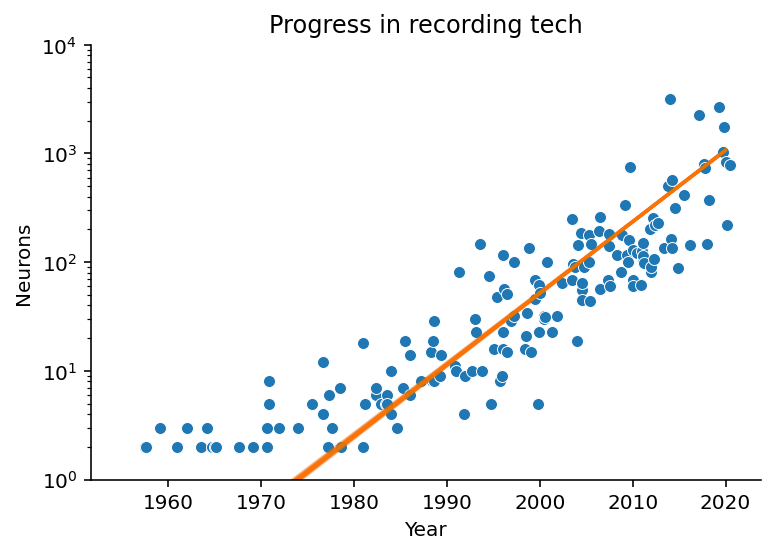

In [8]:
pairs = [(1955, 2021)]

inf, ppc = fit_decade_model(df.query('Method == "Ephys"'), pairs, True)

j = 0
year = np.arange(1955, 2021)

doubling_times = []
for b0, ramps in zip(ppc['b0'], ppc['ramps']):
    slope = ramps[0] / 10
    
    theta = b0
    for i, (lb, ub) in enumerate(pairs):
        theta += ramps[i] * ramp(year, lb, ub)
        
    pred = np.exp(theta)
    doubling_time = np.log(2) / slope
    doubling_times.append(doubling_time)
    
    plt.semilogy(year, pred, alpha=.05, color='xkcd:orange')
    j += 1
    if j > 100:
        break
        
g = sns.scatterplot(x='Year', y='Neurons', data=df.query('Method == "Ephys"'))
g.set(yscale='log')

sns.despine()
plt.title('Progress in recording tech')

plt.ylim([1, 1e4])

print(np.mean(doubling_times), np.std(doubling_times))

In [9]:
def fit_double_exponential_model(df_, return_samples=False):
    with pm.Model() as mdl:

        # define priors, weakly informative Normal
        b0 = pm.Normal("b0_intercept", mu=0, sigma=10)
        b1 = pm.Normal("b1_time", mu=0, sigma=10)
        b2 = pm.Normal("b2_mult", mu=0, sigma=10)

        # define linear model and exp link function
        theta = (
            b0 + np.exp(b1 * (df_.Year.values - 2000) / 10 + b2) - np.exp(b2)
        )

        ## Define Poisson likelihood
        y = pm.Poisson("y", mu=np.exp(theta), observed=df_.Neurons.values)

    ppc = None
    with mdl:
        inf = pm.sample(1000, tune=1000, cores=4, return_inferencedata=True)

        if return_samples:
            ppc = pm.sample_posterior_predictive(
                inf, var_names=["b0_intercept", "b1_time", "b2_mult"]
            )

    return inf, ppc

In [10]:
df_ = df.query('Method == "Ephys" and Year >= 1980')
inf, ppc = fit_double_exponential_model(df_, True)
az.summary(inf)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [b2_mult, b1_time, b0_intercept]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 22 seconds.
The acceptance probability does not match the target. It is 0.9605748624224976, but should be close to 0.8. Try to increase the number of tuning steps.
The number of effective samples is smaller than 25% for some parameters.


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
b0_intercept,3.949,0.014,3.922,3.975,0.000,0.000,1343.0,1460.0,1.00
b1_time,0.213,0.012,0.191,0.238,0.000,0.000,1041.0,1532.0,1.01
b2_mult,1.776,0.071,1.645,1.914,0.002,0.002,1000.0,1479.0,1.01


Let's see how doubling time changes over time under this model.

[3.5955121113695423, 0.04829527272903675]

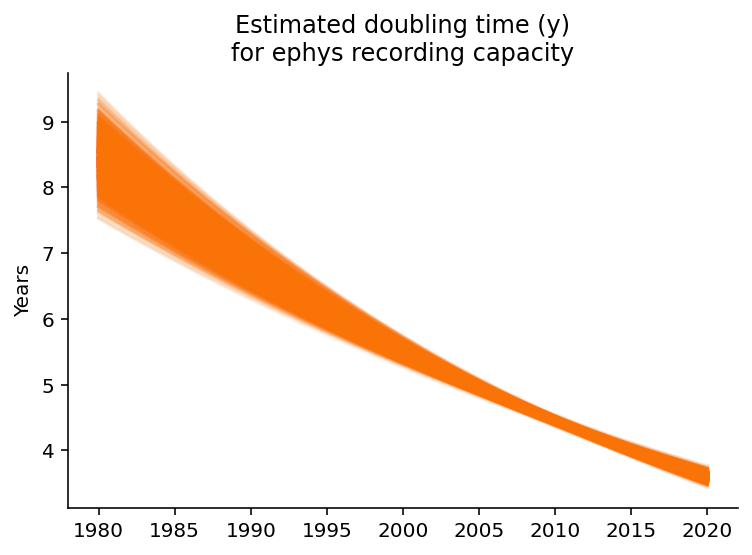

In [11]:
year = np.arange(1980, 2021)
summ = az.summary(inf)

doubling_times = []

for b0, b1, b2 in zip(ppc['b0_intercept'], ppc['b1_time'], ppc['b2_mult']):

    slope = b1 / 10 * np.exp(b1 * (year - 2000) / 10 + b2)
    doubling_time = np.log(2) / slope
    doubling_times.append(doubling_time[-1])

    plt.plot(year, doubling_time, alpha=.05, color='xkcd:orange')

sns.despine()
plt.title('Estimated doubling time (y)\nfor ephys recording capacity')
plt.ylabel('Years')
[np.mean(doubling_times), np.std(doubling_times)]

Text(0, 0.5, 'Units')

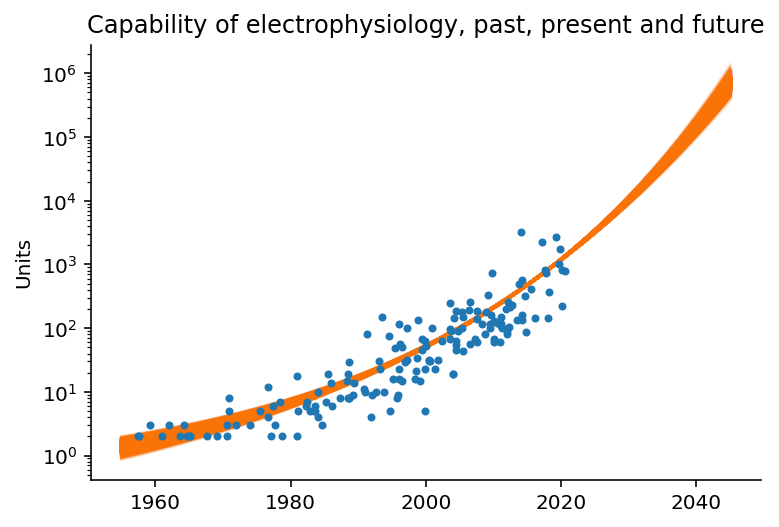

In [12]:
year = np.arange(1955, 2046)
summ = az.summary(inf)

doubling_times = []

for b0, b1, b2 in zip(ppc['b0_intercept'], ppc['b1_time'], ppc['b2_mult']):
    slope = b1 / 10

    pred = np.exp(b0 + np.exp(b1 * (year - 2000) / 10 + b2) - np.exp(b2))
    plt.semilogy(year, pred, alpha=.05, color='xkcd:orange')

df_ = df.query('Method == "Ephys"')
plt.plot(df_.Year.values, df_.Neurons.values, '.')

sns.despine()

plt.title('Capability of electrophysiology, past, present and future')
plt.ylabel('Units')

The accelerating pace of improvements is clear over the last 40 years - doubling time in 2020 is estimated by this model at 3.6 years, with a 95% CI of [3.5, 3.7]. These results project a 1M neuron average recording capability by 2045 - of course, this discounts ceiling effects and potential paradigm shifts, which could adjust these bounds far upward or downward. What about optical imaging? It turns out that the Poisson model works poorly because of overdispersion. Let's try something different - a negative binomial, which is a count model with overdisperson. I tried to let the overdispersion parameter be free, but I was getting convergence problems. Hence I fixed it to 2.0.

In [13]:
def fit_single_overdispersed_model(df_, return_samples=False):
    with pm.Model() as mdl:

        # define priors, weakly informative Normal
        b0 = pm.Normal("b0_intercept", mu=0, sigma=10)
        b1 = pm.Normal("b1_time", mu=0, sigma=10)

        # define linear model and exp link function
        theta = (
            b0
            + b1 * (df_.Year.values - 2000) / 10
        )

        ## Define Poisson likelihood
        y = pm.NegativeBinomial("y", mu=np.exp(theta), observed=df_.Neurons.values, alpha=2.0)

    ppc = None
    with mdl:
        inf = pm.sample(1000, tune=1000, cores=4, return_inferencedata=True)

        if return_samples:
            ppc = pm.sample_posterior_predictive(
                inf, var_names=["b0_intercept", "b1_time"]
            )

    return inf, ppc

df_ = df.query('Method != "Ephys"').dropna()
inf, ppc = fit_single_overdispersed_model(df_, True)
az.summary(inf)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [b1_time, b0_intercept]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 3 seconds.
The number of effective samples is smaller than 25% for some parameters.


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
b0_intercept,3.752,0.792,2.371,5.344,0.034,0.024,556.0,473.0,1.01
b1_time,3.918,0.558,2.782,4.867,0.024,0.017,560.0,460.0,1.01


In [14]:
import matplotlib.pyplot as plt

year = np.arange(1995, 2046)
summ = az.summary(inf)

doubling_times = []

[1.8079835099630426, 0.27824996435942817]

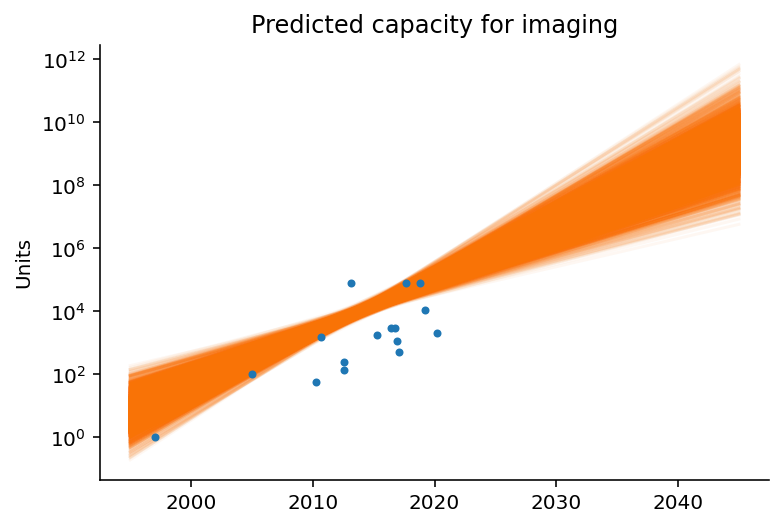

In [15]:
for b0, b1 in zip(ppc['b0_intercept'], ppc['b1_time']):
    slope = b1 / 10
    doubling_time = np.log(2) / slope
    doubling_times.append(doubling_time)

    pred = np.exp(b0 + b1 * (year - 2000) / 10)
    plt.semilogy(year, pred, alpha=.05, color='xkcd:orange')

sns.despine()

df_ = df.query('Method != "Ephys"').dropna()
plt.plot(df_.Year.values, df_.Neurons.values, '.')

plt.title('Predicted capacity for imaging')
plt.ylabel('Units')
[np.mean(doubling_times), np.std(doubling_times)]

These numbers could swing wildly as we add more data, but we see that the doubling rate for imaging is at least twice the current rate for electrodes, which is due to the  market pressures in cellphone sensors and telecommunications (fiber optics and LiDAR), making good sensors very cheap. Many in neurotech have taken note, [including Facebook](https://tech.fb.com/imagining-a-new-interface-hands-free-communication-without-saying-a-word/), which is building light-based BCIs, and Paradromics, which is [adapting some of the fabrication methods from imaging sensors](https://www.biorxiv.org/content/10.1101/2020.07.17.209403v1) to electrophysiology. Thus, this generalized Moore's law of recordings is likely to continue decreasing in doubling time over the foreseeable future. Does this mean recording from every cell in the brain ($10^{11}$ cells) in the next 25 years? Probably not with electrodes - but if progress with light-based sensing continues at the same pace, perhaps.